# Mini project 2 - Data Cleansing Practice on Zillow Data

###### Name: Yangyang Dai

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning. The cleansing of this dataset will be a great start for you to further play with this Kaggle Competition if you have more interest and time.

This step-by-step mini project will illustrate you various ways to impute missing values.

In [111]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
train = pd.read_csv('zillow datasets/train_2016_v2.csv')
properties = pd.read_csv('zillow datasets/properties_2016.csv')

In [115]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [116]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [117]:
properties.shape

(2985217, 58)

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [186]:
#why how="left", is the left and outer the same methods here? 
df_train = pd.merge(train, properties,on="parcelid",how='left')

In [187]:
df_train = df_train.drop(['parcelid', 'transactiondate'],axis=1)
df_train.head()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [126]:
#missing_df=df_train.isnull().sum().sort_values(ascending=False)
missing_df = df_train.isnull().sum().reset_index()
missing_df.columns = ['features', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0].sort_values(by='missing_count',ascending=False)


In [127]:
missing_df

,features,missing_count
6,buildingclasstypeid,90259
13,finishedsquarefeet13,90242
3,basementsqft,90232
41,storytypeid,90232
46,yardbuildingsqft26,90180
49,fireplaceflag,90053
2,architecturalstyletypeid,90014
43,typeconstructiontypeid,89976
16,finishedsquarefeet6,89854
9,decktypeid,89617


In [45]:
# missing_df = missing_df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}

#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

In [134]:
sns.set(rc={'figure.figsize':(14,14)})

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 6 Text xticklabel objects>)

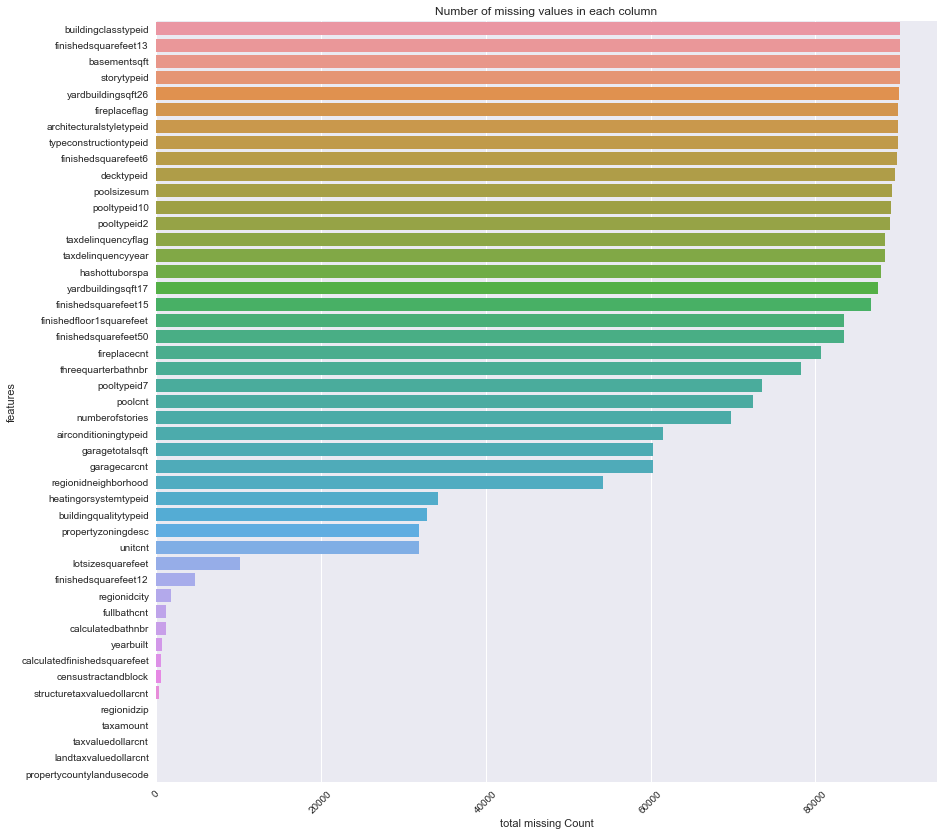

In [139]:
ax = sns.barplot(x='missing_count',y='features',  data=missing_df)
ax.set_xlabel('total missing Count')
ax.set_title("Number of missing values in each column")
plt.xticks(rotation=45)

<img src="missing_value_barplot.png" alt="Drawing" style="width: 600px;"/>

In [136]:
df_train.shape

(90275, 58)

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [137]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 58 columns):
logerror                        90275 non-null float64
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15            3564 non-null float64
finishedsquarefeet50            6856 non-null float64
finishedsquarefeet6        

In [143]:
#why choose these columns to be catcols, some of them are float var
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in df_train.columns if x not in catcols]

In [144]:
numcols

['logerror',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'censustractandblock']

In [146]:
# df_train.info()

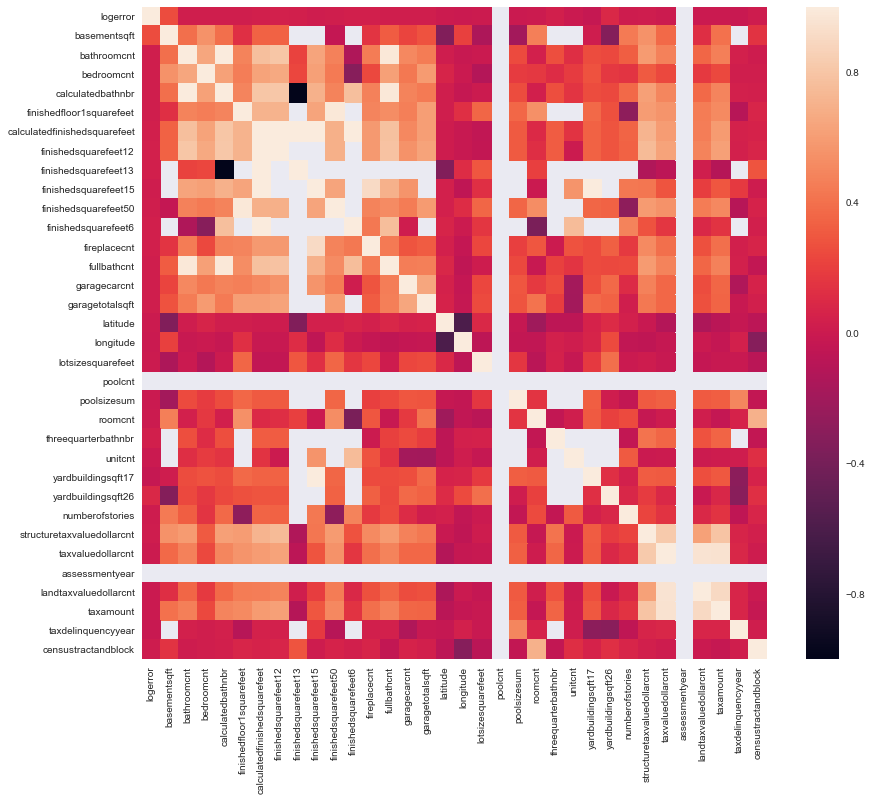

In [151]:
plt.figure(figsize = (14,12))
# correlation for numerical values
sns.heatmap(df_train[numcols].corr())

In [152]:
# def plot_corr(df,size=10):
#     '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

#     Input:
#         df: pandas DataFrame
#         size: vertical and horizontal size of the plot'''

#     corr = df.corr()
#     fig, ax = plt.subplots(figsize=(size, size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)), corr.columns);
#     plt.yticks(range(len(corr.columns)), corr.columns);
corr = df_train[numcols].corr()

In [153]:
corr

,logerror,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,...,yardbuildingsqft17,yardbuildingsqft26,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
logerror,1.000000,0.253395,0.027889,0.025467,0.029448,0.026242,0.038784,0.041922,0.034715,0.019327,...,-0.023692,0.086179,0.013075,0.022085,0.006508,NaN,-0.003051,-0.006671,-0.012996,0.008892
basementsqft,0.253395,1.000000,0.392206,0.554301,0.394347,0.130140,0.341610,0.341610,NaN,NaN,...,0.017574,-0.329200,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869
bathroomcnt,0.027889,0.392206,1.000000,0.646120,1.000000,0.477264,0.772553,0.799372,0.212847,0.633631,...,0.253754,0.234899,0.320834,0.586641,0.476363,NaN,0.353806,0.461900,0.046710,0.013078
bedroomcnt,0.025467,0.554301,0.646120,1.000000,0.618060,0.458030,0.632035,0.657599,0.230639,0.615172,...,0.280245,0.169960,0.150591,0.305405,0.241329,NaN,0.173205,0.239118,0.023705,0.028170
calculatedbathnbr,0.029448,0.394347,1.000000,0.618060,1.000000,0.491804,0.801208,0.805475,-1.000000,0.700655,...,0.256752,0.234899,0.369760,0.611665,0.497763,NaN,0.371634,0.487320,0.046273,0.031270
finishedfloor1squarefeet,0.026242,0.130140,0.477264,0.458030,0.491804,1.000000,0.703525,0.703593,NaN,0.635206,...,0.369195,0.271345,-0.286434,0.597381,0.555679,NaN,0.447279,0.511708,-0.096201,0.073588
calculatedfinishedsquarefeet,0.038784,0.341610,0.772553,0.632035,0.801208,0.703525,1.000000,1.000000,1.000000,1.000000,...,0.339667,0.282325,0.346964,0.716489,0.600018,NaN,0.458550,0.589022,0.051866,0.058793
finishedsquarefeet12,0.041922,0.341610,0.799372,0.657599,0.805475,0.703593,1.000000,1.000000,NaN,NaN,...,0.339691,0.284689,0.341128,0.744048,0.626052,NaN,0.480463,0.612496,0.046090,0.076693
finishedsquarefeet13,0.034715,NaN,0.212847,0.230639,-1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,-0.125721,-0.072517,NaN,0.029611,-0.103859,NaN,0.287874
finishedsquarefeet15,0.019327,NaN,0.633631,0.615172,0.700655,0.635206,1.000000,NaN,NaN,1.000000,...,1.000000,NaN,0.431983,0.423238,0.287586,NaN,0.194818,0.291227,0.173962,0.010797


#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [163]:
dropcols=[]
## 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15' 
## 'finishedsquarefeet6' has strong correlations, but 'calculatedfinishedsquarefeet' doesn't have missing value, so 
## we keep it and delete the rest
dropcols.append('finishedsquarefeet12')
dropcols.append('finishedsquarefeet13')
dropcols.append('finishedsquarefeet15')
dropcols.append('finishedsquarefeet6')

In [164]:
## finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, 
## lets remove finishedsquarefeet50 considering it has more missing values
dropcols.append('finishedsquarefeet50')
##'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' have high relationship as well.
## We keep'bathroomcnt' as has no missing values
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

In [ ]:
# read in feature description file

In [167]:
dic = pd.read_excel("zillow datasets/zillow_data_dictionary.xlsx")

In [169]:
dic

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [162]:
# def drop_col(corr):
#     dropcols = []
#     for i in range(0, len(corr)):
#         for j in range(0,len(corr[i])):
#             print(corr[i][j])
# #             if j > 0.8:
# #                 dropcols.append(j)
#     return dropcols     

# m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.9).any()
# m

In [157]:
# raw = corr.loc[m, m]
# raw

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [188]:
df_train['hashottuborspa'].fillna('None', inplace=True)

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [189]:
df_train['pooltypeid10'].fillna(0, inplace=True)
df_train['pooltypeid2'].fillna(0, inplace=True)
df_train['pooltypeid7'].fillna(0, inplace=True)
df_train['poolcnt'].fillna(0, inplace=True)

(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [190]:
df_train['taxdelinquencyyear'].fillna('None', inplace=True)

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [191]:
df_train['garagecarcnt'].fillna(0, inplace=True)
df_train['garagetotalsqft'].fillna(0, inplace=True)

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [192]:
poolsizesum_median = df_train.loc[df_train.poolcnt>0, 'poolsizesum'].median()

In [193]:
df_train.loc[(df_train.poolcnt>0) & (df_train.poolsizesum.isnull()), 'poolsizesum'] = poolsizesum_median

In [194]:
df_train.loc[(df_train.poolcnt == 0), 'poolsizesum'] = 0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [195]:
df_train['fireplaceflag']= "No"
df_train.loc[df_train['fireplacecnt']>0,'fireplaceflag']= "Yes"

In [196]:
df_train['fireplacecnt'].fillna(0, inplace=True)

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [201]:
df_train.airconditioningtypeid.value_counts()

1.0     26668
13.0     1833
5.0       215
11.0       63
9.0         1
3.0         1
Name: airconditioningtypeid, dtype: int64

In [202]:
df_train['airconditioningtypeid'].fillna(1, inplace=True)

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [204]:
df_train.heatingorsystemtypeid.value_counts()

2.0     72498
7.0     15519
24.0     1071
6.0       970
20.0       97
13.0       76
18.0       25
1.0        13
14.0        2
10.0        2
11.0        1
12.0        1
Name: heatingorsystemtypeid, dtype: int64

In [203]:
df_train['heatingorsystemtypeid'].fillna(2, inplace=True)

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [209]:
missingvalues_prop = (df_train.isnull().sum()/len(df_train)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = "proportion", ascending=False)
missingvalues_prop

,field,proportion
6,buildingclasstypeid,0.999823
13,finishedsquarefeet13,0.999634
3,basementsqft,0.999524
41,storytypeid,0.999524
46,yardbuildingsqft26,0.998948
2,architecturalstyletypeid,0.997109
43,typeconstructiontypeid,0.996688
16,finishedsquarefeet6,0.995336
9,decktypeid,0.992711
55,taxdelinquencyflag,0.980249


In [211]:
missingvalcols = missingvalues_prop[missingvalues_prop.proportion > 0.97].field.tolist()

In [212]:
dropcols = dropcols + missingvalcols

In [213]:
df_train = df_train.drop(dropcols, axis=1)

In [215]:
df_train.head()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,2.0,3.0,4.0,NaN,1684.0,6037.0,0.0,0.0,...,1959.0,NaN,No,122754.0,360170.0,2015.0,237416.0,6735.88,None,6.037107e+13
1,-0.1684,1.0,3.5,4.0,NaN,NaN,2263.0,6059.0,0.0,2.0,...,2014.0,NaN,No,346458.0,585529.0,2015.0,239071.0,10153.02,None,NaN
2,-0.0040,1.0,3.0,2.0,4.0,NaN,2217.0,6037.0,0.0,0.0,...,1940.0,NaN,No,61994.0,119906.0,2015.0,57912.0,11484.48,None,6.037464e+13
3,0.0218,1.0,2.0,2.0,4.0,NaN,839.0,6037.0,0.0,0.0,...,1987.0,NaN,No,171518.0,244880.0,2015.0,73362.0,3048.74,None,6.037296e+13
4,-0.0050,1.0,2.5,4.0,NaN,NaN,2283.0,6059.0,0.0,2.0,...,1981.0,2.0,No,169574.0,434551.0,2015.0,264977.0,5488.96,None,6.059042e+13


#### 11. We can also use some machine learning algorithm to fill the missing data. (you can skip this if you feel so difficult)
In this dataset, there's quite a few variables which are probably dependant on longtitude and latitude data. It is reasonable to fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information).

You don't need to understand the following code, just consider this as a function you can use directly. The following code comes from the link:
https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

In [217]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Works on categorical feature
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

### Example: 
### If you want to impute buildingqualitytypeid with geological information:
"""
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )
"""

## Works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return

**Find out some features you can use this knn to fill the missing data, and use the above funtion to impute them**

In [218]:
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 0.15, n_neighbors = 1 )

fitting
the shape of active features:  (171,)
predicting
writing result to df
num of unperdictable data:  2.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [220]:
df_train.describe()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,90275.000000,90275.000000,90275.000000,90275.000000,57364.000000,6856.000000,89614.000000,90275.000000,90275.000000,90275.000000,...,12009.000000,58353.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,8.967000e+04
mean,0.011457,1.260271,2.279474,3.031869,5.565407,1347.974037,1773.185987,6048.870551,0.126414,0.600897,...,1.008743,1.110414,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,6.049151e+13
std,0.161079,1.721860,1.004271,1.156436,1.900602,652.399026,928.162393,20.663461,0.398912,0.922308,...,0.100830,0.797235,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.046605e+11
min,-4.605000,1.000000,0.000000,0.000000,1.000000,44.000000,2.000000,6037.000000,0.000000,0.000000,...,1.000000,1.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.037101e+13
25%,-0.025300,1.000000,2.000000,2.000000,4.000000,938.000000,1184.000000,6037.000000,0.000000,0.000000,...,1.000000,1.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,6.037320e+13
50%,0.006000,1.000000,2.000000,3.000000,7.000000,1244.000000,1540.000000,6037.000000,0.000000,0.000000,...,1.000000,1.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,6.037615e+13
75%,0.039200,1.000000,3.000000,4.000000,7.000000,1614.000000,2095.000000,6059.000000,0.000000,2.000000,...,1.000000,1.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,6.059042e+13
max,4.737000,13.000000,20.000000,16.000000,12.000000,7625.000000,22741.000000,6111.000000,5.000000,24.000000,...,4.000000,143.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,6.111009e+13


In [221]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 42 columns):
logerror                        90275 non-null float64
airconditioningtypeid           90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fips                            90275 non-null float64
fireplacecnt                    90275 non-null float64
garagecarcnt                    90275 non-null float64
garagetotalsqft                 90275 non-null float64
hashottuborspa                  90275 non-null object
heatingorsystemtypeid           90275 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquarefeet               80125 non-null float64
poolcnt      

In [224]:
df_train.regionidcity.describe()

count     90275.000000
mean      33908.248806
std       46344.945720
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45602.000000
max      396556.000000
Name: regionidcity, dtype: float64